# Ga-English Translation Model with Seq2Seq and LSTM


# Import necessary libraries

In [ ]:
import pandas as pd
from google.colab import drive
import nltk
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Mount Google Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the dataset from Google Drive and display


In [ ]:
data_path = '/content/drive/My Drive/Colab Notebooks/GaTranslate/data_John.txt'
data = pd.read_csv(data_path)


# Tokenization function

In [ ]:
nltk.download('punkt')
def tokenize(text):
    return word_tokenize(text)

# Tokenize and lowercase both English and Ga sentences
data['English_Tokenized'] = data['English'].apply(lambda x: [word.lower() for word in tokenize(x)])
data['Ga_Tokenized'] = data['Ga'].apply(lambda x: [word.lower() for word in tokenize(x)])

# Display tokenized data
data[['English_Tokenized', 'Ga_Tokenized']].head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,English_Tokenized,Ga_Tokenized
0,"[in, the, beginning, was, the, word, and, the,...","[shishijee, mli, lɛ, wiemɔ, lɛ, yɛ, momo, ni, ..."
1,"[he, was, in, the, beginning, with, god]","[lɛ, nɔŋŋ, shishijee, mli, lɛ, ekɛ, nyɔŋmɔ, yɔɔ]"
2,"[all, things, were, made, through, him, and, w...","[lɛ, enɔ, atsɔ̃, afee, nibii, fɛɛ, ni, ashiii,..."
3,"[in, him, was, life, and, the, life, was, the,...","[emli, wala, yɔɔ, ni, wala, lɛ, ji, gbɔmɛi, al..."
4,"[and, the, light, shines, in, the, darkness, a...","[ni, la, lɛ, tsoɔ, yɛ, duŋ, lɛ, mli, ni, duŋ, ..."


In [ ]:
# Determine the maximum sequence length
max_length = max(data['English_Tokenized'].apply(len).max(), data['Ga_Tokenized'].apply(len).max())
print(max_length)

59


# Convert words to numerical representation and pad sequece


In [ ]:
data['English_Numeric'] = data['English_Tokenized'].apply(lambda x: [len(word) for word in x])
data['Ga_Numeric'] = data['Ga_Tokenized'].apply(lambda x: [len(word) for word in x])
data['English_Padded'] = pad_sequences(data['English_Numeric'], maxlen=max_length, padding='post').tolist()
data['Ga_Padded'] = pad_sequences(data['Ga_Numeric'], maxlen=max_length, padding='post').tolist()

# Split data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Display the padded sequences
data[['English_Padded', 'Ga_Padded']].head()


,English_Padded,Ga_Padded
0,"[2, 3, 9, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 4, ...","[9, 3, 2, 5, 2, 2, 4, 2, 5, 2, 2, 6, 3, 2, 5, ..."
1,"[2, 3, 2, 3, 9, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 4, 9, 3, 2, 3, 6, 3, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[3, 6, 4, 4, 7, 3, 3, 7, 3, 7, 3, 4, 4, 3, 4, ...","[2, 3, 5, 4, 5, 3, 2, 6, 2, 5, 2, 2, 2, 2, 2, ..."
3,"[2, 3, 3, 4, 3, 3, 4, 3, 3, 5, 2, 3, 0, 0, 0, ...","[4, 4, 3, 2, 4, 2, 2, 6, 3, 2, 0, 0, 0, 0, 0, ..."
4,"[3, 3, 5, 6, 2, 3, 8, 3, 3, 8, 3, 3, 10, 2, 0,...","[2, 2, 2, 4, 2, 3, 2, 3, 2, 3, 2, 5, 3, 3, 0, ..."


In [ ]:
# Create Tokenizers for English and Ga languages
eng_tokenizer = Tokenizer()
ga_tokenizer = Tokenizer()

# Fit the Tokenizers on the text data
eng_tokenizer.fit_on_texts(data['English_Tokenized'])
ga_tokenizer.fit_on_texts(data['Ga_Tokenized'])

Convert tect in sequence of integers


In [ ]:
# Convert text to sequences of integers
data['English_Seq'] = eng_tokenizer.texts_to_sequences(data['English_Tokenized'])
data['Ga_Seq'] = ga_tokenizer.texts_to_sequences(data['Ga_Tokenized'])

# Display the sequences
data[['English_Seq', 'Ga_Seq']].head()

,English_Seq,Ga_Seq
0,"[15, 1, 181, 24, 1, 107, 2, 1, 107, 24, 50, 33...","[463, 13, 1, 124, 1, 8, 224, 2, 124, 1, 14, 32..."
1,"[5, 24, 15, 1, 181, 50, 33]","[1, 107, 463, 13, 1, 75, 32, 46]"
2,"[75, 66, 67, 93, 182, 8, 2, 448, 8, 140, 24, 9...","[1, 54, 225, 108, 276, 31, 2, 712, 1, 713, 4, ..."
3,"[15, 8, 24, 55, 2, 1, 55, 24, 1, 108, 7, 183]","[125, 55, 46, 2, 55, 1, 16, 152, 714, 1]"
4,"[2, 1, 108, 594, 15, 1, 295, 2, 1, 295, 58, 11...","[2, 77, 1, 354, 8, 226, 1, 13, 2, 226, 1, 464,..."


# Define the Seq2Seq Model with LSTM

In [ ]:
latent_dim = 256  # Dimension of the hidden state in the LSTM

# Encoder (English) ,  Decoder (Ga)


In [ ]:
# Encoder (English)
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(input_dim=len(eng_tokenizer.word_index) + 1, output_dim=latent_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder (Ga)
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(input_dim=len(ga_tokenizer.word_index) + 1, output_dim=latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(len(ga_tokenizer.word_index) + 1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:

# Define the Seq2Seq model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Display the model summary
model.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_18            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_10 (Embedding)  │ (None, None, 256)      │        262,400 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_11 (Embedding)  │ (None, None, 256)      │        404,224 │ input_layer_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_10 (LSTM)            │ [(None, 256), (None,   │        525,312 │ embedding_10[0][0]     │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_11 (LSTM)            │ [(None, None, 256),    │        525,312 │ embedding_11[0][0],    │
│                           │ (None, 256), (None,    │                │ lstm_10[0][1],         │
│                           │ 256)]                  │                │ lstm_10[0][2]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, None, 1579)     │        405,803 │ lstm_11[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,123,051 (8.10 MB)

 Trainable params: 2,123,051 (8.10 MB)

 Non-trainable params: 0 (0.00 B)

# Prepare input data for training

In [ ]:
encoder_input_data = np.array(data['English_Padded'].tolist())
decoder_input_data = np.array(data['Ga_Padded'].tolist())

# Shift Ga sequences by one position for target data
decoder_target_data = np.zeros_like(decoder_input_data)
decoder_target_data[:, :-1] = decoder_input_data[:, 1:]
decoder_target_data = np.expand_dims(decoder_target_data, -1)

# Train the Seq2Seq Model and plot training and validation



Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 6.7771 - val_loss: 3.6320
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - loss: 2.8257 - val_loss: 1.6413
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - loss: 1.2560 - val_loss: 1.0241
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.8805 - val_loss: 0.8475
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.7363 - val_loss: 0.7638
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 0.6748 - val_loss: 0.7281
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.6474 - val_loss: 0.7080
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - loss: 0.6421 - val_loss: 0.7004
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.6247 - val_loss: 0.6960
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.6142 - val_loss: 0.6932
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.6145 - val_loss: 0.6904
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.6080 - val_loss: 0.6891
Epoch 13/20
6/6 ━

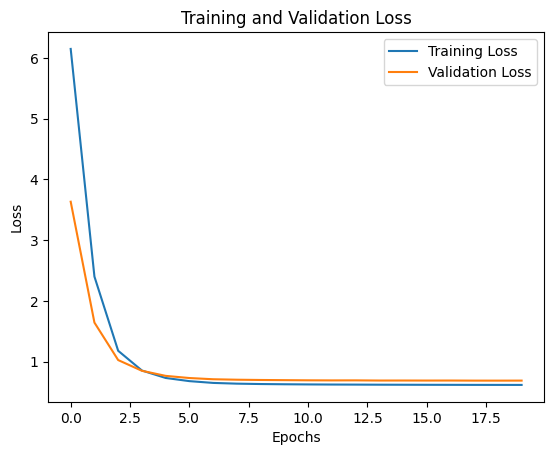

In [ ]:
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
                    batch_size=64, epochs=20, validation_split=0.2)


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test set
test_loss = model.evaluate([encoder_input_test, decoder_input_test], decoder_target_test, verbose=0)

# Print the test loss and accuracy
print("Test Loss:", test_loss)

test_accuracy = model.evaluate([encoder_input_test, decoder_input_test], decoder_target_test, verbose=0)[1]
print("Test Accuracy:", test_accuracy)


Test Loss: [0.636796236038208, 0.7884886860847473]
Test Accuracy: 0.7884886860847473


#Inference



In [ ]:
# Define Encoder Model for Inference
encoder_model = Model(encoder_inputs, encoder_states)

# Define Decoder Model for Inference
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)

# Define the decoder inference model
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

# Function to decode sequences during inference

In [ ]:
def decode_sequence(input_seq, max_length=20, max_iterations=50):
    """

    Args:
      input_seq:
      max_length:
      max_iterations:

    Returns:

    """
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = 1  # Assuming '1' is the start token index for Ga

    # Sampling loop for a batch of sequences
    stop_condition = False
    decoded_sentence = ''
    iterations = 0  # To track number of iterations

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])

        # Check if the index exists in the Ga tokenizer
        if sampled_token_index in ga_tokenizer.index_word:
            sampled_word = ga_tokenizer.index_word[sampled_token_index]
        else:
            sampled_word = '<unknown>'  # Handle unknown tokens

        decoded_sentence += ' ' + sampled_word

        # Exit conditions: either hit max length, find end token, or exceed max iterations
        if (sampled_word == '<end>' or len(decoded_sentence.split()) > max_length or iterations > max_iterations):
            stop_condition = True

        # Update the target sequence (of length 1) for next word prediction
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

        iterations += 1  # Increment iteration count

    return decoded_sentence.strip()  # Return the translation, removing leading/trailing spaces

# Traslation


In [ ]:
# Translate a sample sentence from English to Ga
new_sentence = "In the beginning was the Word"
new_sentence_seq = eng_tokenizer.texts_to_sequences([new_sentence.split()])
new_sentence_padded = pad_sequences(new_sentence_seq, maxlen=max_length, padding='post')
translation = decode_sequence(new_sentence_padded)
print("Translation:", translation)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Translation: ni ni ni ni ni ni ni ni ni ni ni ni ni ni ni ni ni ni ni ni ni
